In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sb
low_memory=False
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = 'Modelo03_1979_2015.csv'
df = pd.read_csv(filename,sep=';')

In [3]:
df.shape

(18, 7)

In [4]:
df.describe()

,FAIXA_ETARIA,OBITOS_HOMES,TAXA_ESPECIFICA_HOMES,OBITOS_MULHERES,TAXA_ESPECIFICA_MULHERES,OBITOS_TODOS,TAXA_ESPECIFICA_TODOS
count,16,16,16,16,16,16,16
unique,16,14,15,14,14,14,15
top,Taxa Padrao Brasil,-,"0,01",-,"0,01",-,"0,01"
freq,1,3,2,3,3,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
FAIXA_ETARIA                16 non-null object
OBITOS_HOMES                16 non-null object
TAXA_ESPECIFICA_HOMES       16 non-null object
OBITOS_MULHERES             16 non-null object
TAXA_ESPECIFICA_MULHERES    16 non-null object
OBITOS_TODOS                16 non-null object
TAXA_ESPECIFICA_TODOS       16 non-null object
dtypes: object(7)
memory usage: 1.1+ KB


In [6]:
df['OBITOS_HOMES'] = df['OBITOS_HOMES'].apply(pd.to_numeric, errors='coerce').abs()
df['OBITOS_MULHERES'] = df['OBITOS_MULHERES'].apply(pd.to_numeric, errors='coerce').abs()
df['OBITOS_TODOS'] = df['OBITOS_TODOS'].apply(pd.to_numeric, errors='coerce').abs()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
FAIXA_ETARIA                16 non-null object
OBITOS_HOMES                13 non-null float64
TAXA_ESPECIFICA_HOMES       16 non-null object
OBITOS_MULHERES             13 non-null float64
TAXA_ESPECIFICA_MULHERES    16 non-null object
OBITOS_TODOS                13 non-null float64
TAXA_ESPECIFICA_TODOS       16 non-null object
dtypes: float64(3), object(4)
memory usage: 1.1+ KB


In [9]:
df.head(16)

,FAIXA_ETARIA,OBITOS_HOMES,TAXA_ESPECIFICA_HOMES,OBITOS_MULHERES,TAXA_ESPECIFICA_MULHERES,OBITOS_TODOS,TAXA_ESPECIFICA_TODOS
0,00 a 04,38.0,"0,01",22.0,"0,01",61.0,"0,01"
1,05 a 09,25.0,"0,01",17.0,"0,01",42.0,"0,01"
2,10 a 14,80.0,"0,03",44.0,"0,01",124.0,"0,02"
3,15 a 19,284.0,"0,09",186.0,"0,06",470.0,"0,08"
4,20 a 29,1920.0,"0,37",1770.0,"0,33",3693.0,"0,35"
5,30 a 39,5205.0,"1,25",5823.0,"1,33",11032.0,"1,29"
6,40 a 49,11685.0,"3,71",13687.0,"4,13",25383.0,"3,92"
7,50 a 59,23589.0,"11,04",24472.0,"10,61",48073.0,"10,82"
8,60 a 69,35420.0,"26,53",34177.0,"22,53",69623.0,"24,41"
9,70 a 79,36755.0,"54,34",39455.0,"47,19",76239.0,"50,41"


In [10]:
df.drop('TAXA_ESPECIFICA_HOMES', axis=1,inplace=True)
df.drop('TAXA_ESPECIFICA_MULHERES', axis=1,inplace=True)
df.drop('TAXA_ESPECIFICA_TODOS', axis=1,inplace=True)
df = df.dropna()

In [12]:
df.head()

,FAIXA_ETARIA,OBITOS_HOMES,OBITOS_MULHERES,OBITOS_TODOS
0,00 a 04,38.0,22.0,61.0
1,05 a 09,25.0,17.0,42.0
2,10 a 14,80.0,44.0,124.0
3,15 a 19,284.0,186.0,470.0
4,20 a 29,1920.0,1770.0,3693.0


In [13]:
df.head(16)

,FAIXA_ETARIA,OBITOS_HOMES,OBITOS_MULHERES,OBITOS_TODOS
0,00 a 04,38.0,22.0,61.0
1,05 a 09,25.0,17.0,42.0
2,10 a 14,80.0,44.0,124.0
3,15 a 19,284.0,186.0,470.0
4,20 a 29,1920.0,1770.0,3693.0
5,30 a 39,5205.0,5823.0,11032.0
6,40 a 49,11685.0,13687.0,25383.0
7,50 a 59,23589.0,24472.0,48073.0
8,60 a 69,35420.0,34177.0,69623.0
9,70 a 79,36755.0,39455.0,76239.0


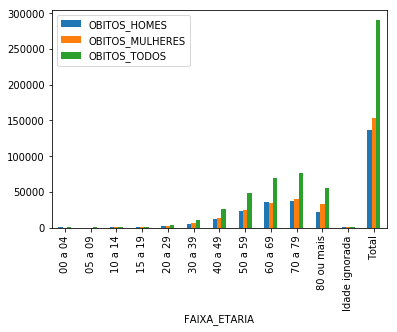

In [14]:
df.plot.bar(x = 'FAIXA_ETARIA')

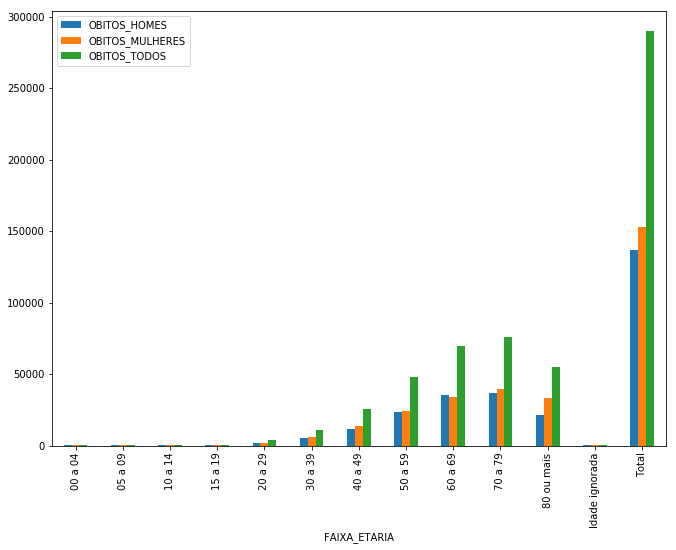

In [15]:
df.plot.bar(x = 'FAIXA_ETARIA', figsize=(11, 8), fontsize = 10)